<a href="https://colab.research.google.com/github/GuilhermeCamposFerreira/Imagens_medicas_USP-RIB0107-/blob/main/Pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conectando com o Google Drive e importando bibliotecas

In [1]:
#aqui montamos o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!pip install pynrrd
!pip install slicerio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import nrrd
import slicerio

# Máscaras

In [5]:
#aqui colocamos o diretorio
os.chdir('/content/drive/MyDrive/Imagens_2.0/')
PATH = "./SPAIR/"

In [6]:
#DEFININDO O DIRETÓRIO
path_mask = '/content/drive/MyDrive/Imagens_2.0/3-Segmentation_NRRD'

#ACESSANDO O DIRETÓRIO DAS IMAGENS SEGMENTADAS
os.chdir(path_mask)

#LENDO OS ARQUIVOS

#dicionário que armazena os arquivos
masks = dict()
masks_header = dict()

#substrings
sub1 = '3-Segmentation_NRRD'
sub2 = '.seg.nrrd'


print(os.listdir())

['P25L1.seg.nrrd', 'P39L5.seg.nrrd', 'P49L1.seg.nrrd', 'P60L2.seg.nrrd', 'P46L4.seg.nrrd', 'P14L3.seg.nrrd', 'P41L4.seg.nrrd', 'P17L3.seg.nrrd', 'P24L5.seg.nrrd', 'P3L1.seg.nrrd', 'P35L3.seg.nrrd', 'P16L1.seg.nrrd', 'P10L3.seg.nrrd', 'P55L3.seg.nrrd', 'P33L1.seg.nrrd', 'P22L2.seg.nrrd', 'P28L4.seg.nrrd', 'P9L2.seg.nrrd', 'P35L4.seg.nrrd', 'P2L1.seg.nrrd', 'P42L4.seg.nrrd', 'P10L2.seg.nrrd', 'P54L1.seg.nrrd', 'P8L3.seg.nrrd', 'P4L3.seg.nrrd', 'P61L1.seg.nrrd', 'P42L5.seg.nrrd', 'P43L3.seg.nrrd', 'P23L1.seg.nrrd', 'P5L4.seg.nrrd', 'P59L4.seg.nrrd', 'P15L4.seg.nrrd', 'P29L1.seg.nrrd', 'P38L5.seg.nrrd', 'P51L5.seg.nrrd', 'P42L2.seg.nrrd', 'P36L2.seg.nrrd', 'P42L3.seg.nrrd', 'P57L1.seg.nrrd', 'P26L3.seg.nrrd', 'P18L4.seg.nrrd', 'P13L2.seg.nrrd', 'P55L2.seg.nrrd', 'P35L1.seg.nrrd', 'P16L2.seg.nrrd', 'P26L1.seg.nrrd', 'P7L1.seg.nrrd', 'P38L4.seg.nrrd', 'P6L1.seg.nrrd', 'P32L1.seg.nrrd', 'P42L1.seg.nrrd', 'P35L2.seg.nrrd', 'P43L4.seg.nrrd', 'P45L5.seg.nrrd', 'P20L1.seg.nrrd', 'P48L3.seg.nrrd',

In [7]:
#loop que lê os arquivos
for file in os.listdir():
    #lê somente arquivos .nrrd
    if file.endswith('.nrrd'):
        file_path = f'{path_mask}/{file}'

        
        #pegando o index (Posição da sub1 e sub2 na string do file_path)
        idx1 = file_path.index(sub1)
        idx2 = file_path.index(sub2)
        
        res = ''
        #criando as chaves para o dicionário 
        for idx in range(idx1 + len(sub1), idx2):
            res = res + file_path[idx]

        #lendo os arquivos nrrd e salvando nos dicionários
        masks[res],masks_header[res] = nrrd.read(file_path)


#Extraindo o número do paciente e o corte do exame
import re
lst = list() #Criando dicionário
key = masks.keys() #Lista com as chaves do dicionário masks

#Retirando / L P de cada código do paciente
for k in key:
  tmp1 = k.strip("/")
  tmp2 = re.split(r'P|L', tmp1)
  lst.append((int(tmp2[1]), tmp2[2]))

#Lista de tuplas com o pacientes e exames ordenados
lst = sorted(lst)

print(lst)



[(1, '1'), (2, '1'), (2, '3'), (2, '5'), (3, '1'), (4, '3'), (5, '1'), (5, '4'), (6, '1'), (6, '3'), (6, '5'), (7, '1'), (8, '3'), (8, '4'), (8, '5'), (9, '2'), (10, '1'), (10, '2'), (10, '3'), (10, '4'), (10, '5'), (11, '2'), (12, '2'), (13, '2'), (14, '1'), (14, '3'), (15, '2'), (15, '4'), (16, '1'), (16, '2'), (17, '3'), (18, '4'), (19, '1'), (20, '1'), (21, '2'), (22, '2'), (23, '1'), (23, '2'), (24, '2'), (24, '3'), (24, '5'), (25, '1'), (26, '1'), (26, '2'), (26, '3'), (26, '4'), (27, '4'), (28, '4'), (29, '1'), (30, '1'), (31, '1'), (32, '1'), (32, '4'), (33, '1'), (34, '1'), (35, '1'), (35, '2'), (35, '3'), (35, '4'), (35, '5'), (36, '2'), (37, '4'), (38, '3'), (38, '4'), (38, '5'), (39, '5'), (40, '4'), (41, '4'), (41, '5'), (42, '1'), (42, '2'), (42, '3'), (42, '4'), (42, '5'), (43, '3'), (43, '4'), (44, '3'), (45, '1'), (45, '3'), (45, '5'), (46, '4'), (47, '3'), (48, '3'), (49, '1'), (49, '5'), (50, '5'), (51, '2'), (51, '5'), (52, '4'), (53, '1'), (54, '1'), (55, '2'), (55

In [ ]:
for key in masks:
  print(key)

In [9]:
#lista de PacientesExames completa n(/PnumLnum)
lstC = list()
for p, e in lst:
  key = "/P" + str(p) + "L" + str(e)
  lstC.append(key)

print(lstC)

['/P1L1', '/P2L1', '/P2L3', '/P2L5', '/P3L1', '/P4L3', '/P5L1', '/P5L4', '/P6L1', '/P6L3', '/P6L5', '/P7L1', '/P8L3', '/P8L4', '/P8L5', '/P9L2', '/P10L1', '/P10L2', '/P10L3', '/P10L4', '/P10L5', '/P11L2', '/P12L2', '/P13L2', '/P14L1', '/P14L3', '/P15L2', '/P15L4', '/P16L1', '/P16L2', '/P17L3', '/P18L4', '/P19L1', '/P20L1', '/P21L2', '/P22L2', '/P23L1', '/P23L2', '/P24L2', '/P24L3', '/P24L5', '/P25L1', '/P26L1', '/P26L2', '/P26L3', '/P26L4', '/P27L4', '/P28L4', '/P29L1', '/P30L1', '/P31L1', '/P32L1', '/P32L4', '/P33L1', '/P34L1', '/P35L1', '/P35L2', '/P35L3', '/P35L4', '/P35L5', '/P36L2', '/P37L4', '/P38L3', '/P38L4', '/P38L5', '/P39L5', '/P40L4', '/P41L4', '/P41L5', '/P42L1', '/P42L2', '/P42L3', '/P42L4', '/P42L5', '/P43L3', '/P43L4', '/P44L3', '/P45L1', '/P45L3', '/P45L5', '/P46L4', '/P47L3', '/P48L3', '/P49L1', '/P49L5', '/P50L5', '/P51L2', '/P51L5', '/P52L4', '/P53L1', '/P54L1', '/P55L2', '/P55L3', '/P56L1', '/P56L2', '/P57L1', '/P58L3', '/P59L4', '/P60L2', '/P61L1', '/P62L4', '/P63

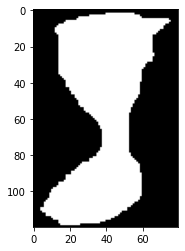

In [10]:
#Imagens ordenadas para todos os pacientes, ordenadas por paciente e exame
for i in lstC:
  plt.imshow(masks[i][:,:,1], cmap='gray')
  #plt.show()


# Imagens

In [11]:
#DEFININDO O DIRETÓRIO
path_images = '/content/drive/MyDrive/Imagens_2.0/2-Rescaled_256_NRRD'

#ACESSANDO O DIRETÓRIO DAS IMAGENS
os.chdir(path_images)

#LENDO OS ARQUIVOS

#dicionário que armazena os arquivos
images = dict()

#substrings
sub1 = '2-Rescaled_256_NRRD'
sub2 = '.nrrd'

#loop que lê os arquivos
for file in os.listdir():
    #lê somente arquivos .nrrd
    if file.endswith('.nrrd'):
        file_path = f'{path_images}/{file}'
        
        #pegando o index 
        idx1 = file_path.index(sub1)
        idx2 = file_path.index(sub2)
        
        res = ''
        #criando as chaves para o dicionário
        for idx in range(idx1 + len(sub1), idx2):
            res = res + file_path[idx]
        
        #lendo os arquivos nrrd
        images[res],_ = nrrd.read(file_path)
'''plt.imshow(images['/P'+ 'x'][:,:,7], cmap='gray' )
plt.show()
plt.imshow(images['/P1'][:,:,5],cmap='gray', zorder=0)
plt.scatter(182,267, color='red', s=42,zorder=1)'''

"plt.imshow(images['/P'+ 'x'][:,:,7], cmap='gray' )\nplt.show()\nplt.imshow(images['/P1'][:,:,5],cmap='gray', zorder=0)\nplt.scatter(182,267, color='red', s=42,zorder=1)"

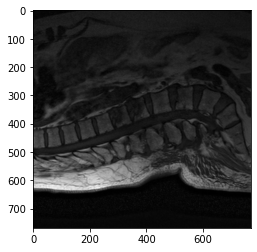

In [12]:
#for file in str(lst[0]:
for i in range(1,17):
  plt.imshow(images['/P' + str(i)][:,:,5], cmap='gray')
  #plt.show()

# Sobreposição da mascara sobre a imagem


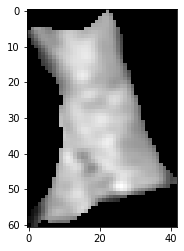

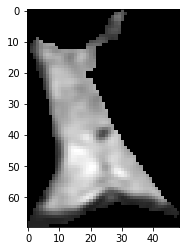

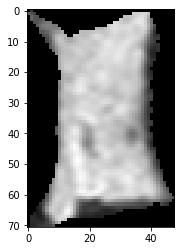

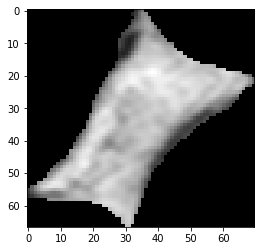

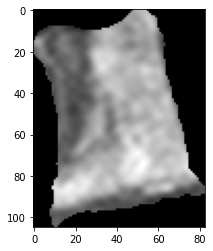

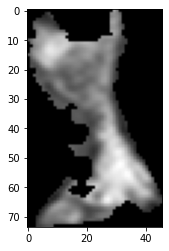

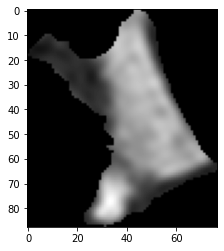

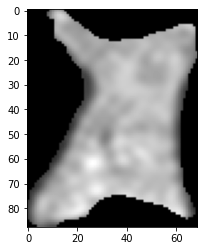

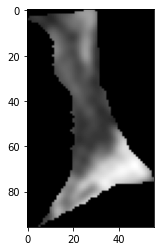

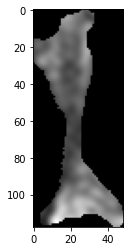

In [13]:
def submatrix(arr):
    x, y = np.nonzero(arr)
    # Using the smallest and largest x and y indices of nonzero elements, 
    # we can find the desired rectangular bounds.  
    # And don't forget to add 1 to the top bound to avoid the fencepost problem.
    return arr[x.min():x.max()+1, y.min():y.max()+1]
def segmentarImagem(mask,header,image):
    
    #mapeia a referência da imagem original de string para int
    refImY,refImX,refImZ = list(map(int, header['Segmentation_ReferenceImageExtentOffset'].split()))
    
    #pegando o tamanhoda máscara
    sizeMaskY, sizeMaskX = mask[:,:,2].shape
    
    #inicializando matriz segmentos
    segmentos = np.zeros(image.shape[0:2])
    
    #colocando a máscara dentro da matriz segmentos
    segmentos[refImY:refImY+sizeMaskY,refImX:refImX+sizeMaskX] = segmentos[refImY:refImY+sizeMaskY,refImX:refImX+sizeMaskX] + mask[:,:,0]
    
    #multiplicando a imagem original pela máscara
    segmentos = segmentos*image[:,:,refImZ+2]
    
    return submatrix(segmentos)

segmentos = dict()

for im_key, im_value in images.items():
    for mask_key, mask_value in masks.items():
        
        if (len(im_key)==3) & (len(mask_key)==5):
            if im_key == mask_key[0:3]: 
                segmentos[mask_key] = segmentarImagem(masks[mask_key],masks_header[mask_key],images[im_key])
                
        elif (len(im_key)==4) & (len(mask_key)==6):
            if im_key == mask_key[0:4]: 
                segmentos[mask_key] = segmentarImagem(masks[mask_key],masks_header[mask_key],images[im_key])
for img in lstC[:10]:
  plt.imshow(segmentos[img],cmap='gray')
  plt.show()

# Extração de atriutos

In [14]:
#Importando biblioteca
!pip install pyradiomics

import SimpleITK as sitk

from radiomics import featureextractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.5 MB 95 kB/s 
     |████████████████████████████████| 52.7 MB 1.2 MB/s 
     |████████████████████████████████| 109 kB 42.3 MB/s 
     |████████████████████████████████| 555 kB 58.2 MB/s 
  Created wheel for pyradiomics: filename=pyradiomics-3.0.1-cp38-cp38-linux_x86_64.whl size=178968 sha256=a9590978ac2b3303e57df4aa41e5254f8665d17fe538293270ae871dfecc642f
  Stored in directory: /root/.cache/pip/wheels/df/be/06/5d09092e41d20673137f10ae62fb8d9da9adf14ce2552d7bea
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=061a059c6536944ec7435aca64c4e26f48de3e7de6cced485b947ad67be46119
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built pyradiomics docopt


Criando as imagens para o Pyradiomics

In [15]:
#lista com 93 atributos interessantes
keysToExtract = ['original_firstorder_10Percentile', 
                 'original_firstorder_90Percentile', 
                 'original_firstorder_Energy', 
                 'original_firstorder_Entropy', 
                 'original_firstorder_InterquartileRange', 
                 'original_firstorder_Kurtosis', 
                 'original_firstorder_Maximum', 
                 'original_firstorder_MeanAbsoluteDeviation', 
                 'original_firstorder_Mean', 
                 'original_firstorder_Median', 
                 'original_firstorder_Minimum', 
                 'original_firstorder_Range', 
                 'original_firstorder_RobustMeanAbsoluteDeviation', 
                 'original_firstorder_RootMeanSquared', 
                 'original_firstorder_Skewness', 
                 'original_firstorder_TotalEnergy', 
                 'original_firstorder_Uniformity', 
                 'original_firstorder_Variance', 
                 'original_glcm_Autocorrelation', 
                 'original_glcm_ClusterProminence', 
                 'original_glcm_ClusterShade', 
                 'original_glcm_ClusterTendency', 
                 'original_glcm_Contrast', 
                 'original_glcm_Correlation', 
                 'original_glcm_DifferenceAverage', 
                 'original_glcm_DifferenceEntropy', 
                 'original_glcm_DifferenceVariance', 
                 'original_glcm_Id', 
                 'original_glcm_Idm', 
                 'original_glcm_Idmn', 
                 'original_glcm_Idn', 
                 'original_glcm_Imc1', 
                 'original_glcm_Imc2', 
                 'original_glcm_InverseVariance', 
                 'original_glcm_JointAverage', 
                 'original_glcm_JointEnergy', 
                 'original_glcm_JointEntropy', 
                 'original_glcm_MCC', 
                 'original_glcm_MaximumProbability', 
                 'original_glcm_SumAverage', 
                 'original_glcm_SumEntropy', 
                 'original_glcm_SumSquares', 
                 'original_gldm_DependenceEntropy', 
                 'original_gldm_DependenceNonUniformity', 
                 'original_gldm_DependenceNonUniformityNormalized', 
                 'original_gldm_DependenceVariance', 
                 'original_gldm_GrayLevelNonUniformity', 
                 'original_gldm_GrayLevelVariance', 
                 'original_gldm_HighGrayLevelEmphasis', 
                 'original_gldm_LargeDependenceEmphasis', 
                 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 
                 'original_gldm_LargeDependenceLowGrayLevelEmphasis', 
                 'original_gldm_LowGrayLevelEmphasis', 
                 'original_gldm_SmallDependenceEmphasis', 
                 'original_gldm_SmallDependenceHighGrayLevelEmphasis',
                 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 
                 'original_glrlm_GrayLevelNonUniformity', 
                 'original_glrlm_GrayLevelNonUniformityNormalized', 
                 'original_glrlm_GrayLevelVariance', 
                 'original_glrlm_HighGrayLevelRunEmphasis', 
                 'original_glrlm_LongRunEmphasis', 
                 'original_glrlm_LongRunHighGrayLevelEmphasis', 
                 'original_glrlm_LongRunLowGrayLevelEmphasis',
                 'original_glrlm_LowGrayLevelRunEmphasis', 
                 'original_glrlm_RunEntropy', 
                 'original_glrlm_RunLengthNonUniformity', 
                 'original_glrlm_RunLengthNonUniformityNormalized',
                 'original_glrlm_RunPercentage',
                 'original_glrlm_RunVariance', 
                 'original_glrlm_ShortRunEmphasis', 
                 'original_glrlm_ShortRunHighGrayLevelEmphasis', 
                 'original_glrlm_ShortRunLowGrayLevelEmphasis', 
                 'original_glszm_GrayLevelNonUniformity', 
                 'original_glszm_GrayLevelNonUniformityNormalized', 
                 'original_glszm_GrayLevelVariance', 
                 'original_glszm_HighGrayLevelZoneEmphasis',
                 'original_glszm_LargeAreaEmphasis',
                 'original_glszm_LargeAreaHighGrayLevelEmphasis',
                 'original_glszm_LargeAreaLowGrayLevelEmphasis',
                 'original_glszm_LowGrayLevelZoneEmphasis',
                 'original_glszm_SizeZoneNonUniformity',
                 'original_glszm_SizeZoneNonUniformityNormalized',
                 'original_glszm_SmallAreaEmphasis',
                 'original_glszm_SmallAreaHighGrayLevelEmphasis',
                 'original_glszm_SmallAreaLowGrayLevelEmphasis',
                 'original_glszm_ZoneEntropy', 
                 'original_glszm_ZonePercentage',
                 'original_glszm_ZoneVariance', 
                 'original_ngtdm_Busyness', 
                 'original_ngtdm_Coarseness', 
                 'original_ngtdm_Complexity', 
                 'original_ngtdm_Contrast', 
                 'original_ngtdm_Strength']

In [16]:
imagens_atributos = dict()

#Lendo e extraindo os atributos de cada imagem
#Para utilizar o extrator é preciso entrar com a imagem e sua respectiva máscara
for key in segmentos.keys():
  #Criando a mascara
  mascara = np.where(segmentos[key] == 0, 0, 1)
  #Transformando em imagens ITK (necessidade da biblioteca)
  sitk_mask = sitk.GetImageFromArray(mascara)
  sitk_image = sitk.GetImageFromArray(segmentos[key])
  #Utilizando o extrator
  extractor = featureextractor.RadiomicsFeatureExtractor()
  atributos = extractor.execute(sitk_image, sitk_mask) 
  #Extraind o valor de cada atributo
  atributos = dict( (k,atributos[k]) for k in keysToExtract)
  #Criando um dicinário com o valor de cada atributo emparelhado com o nome do atributo
  imagens_atributos[key] = atributos
imagens_atributos

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radi

{'/P55L3': {'original_firstorder_10Percentile': array(44.2),
  'original_firstorder_90Percentile': array(82.),
  'original_firstorder_Energy': array(7422520.),
  'original_firstorder_Entropy': array(1.50721986),
  'original_firstorder_InterquartileRange': array(14.),
  'original_firstorder_Kurtosis': array(4.93483997),
  'original_firstorder_Maximum': array(91.),
  'original_firstorder_MeanAbsoluteDeviation': array(11.38226286),
  'original_firstorder_Mean': array(67.38956858),
  'original_firstorder_Median': array(72.),
  'original_firstorder_Minimum': array(15.),
  'original_firstorder_Range': array(76.),
  'original_firstorder_RobustMeanAbsoluteDeviation': array(6.83821995),
  'original_firstorder_RootMeanSquared': array(69.13372541),
  'original_firstorder_Skewness': array(-1.48906567),
  'original_firstorder_TotalEnergy': array(7422520.),
  'original_firstorder_Uniformity': array(0.40029911),
  'original_firstorder_Variance': array(238.11803671),
  'original_glcm_Autocorrelation':

In [17]:
import pandas as pd

#criando dataframe e colocando /PaaLbb no eixo Y
data = pd.DataFrame(imagens_atributos).transpose()
data

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
/P55L3,44.20000000000002,82.0,7422520.0,1.5072198559312433,14.0,4.934839967961936,91.0,11.382262857465083,67.38956857694784,72.0,...,1.2763998932446337,0.0668930278025271,4.483856189774717,0.016097875080489377,23715.9456,9.79240568461228,0.00873017096210035,1.3534100451484836,0.01828490328249093,0.06157524501266441
/P55L2,27.0,72.0,4979560.0,1.4802309667418654,26.0,2.3224657581886357,88.0,14.406651791147713,53.644585987261145,59.0,...,0.7641767699586658,0.1294029924340706,4.152391277629861,0.014012738853503185,38649.95867768595,7.401991482477685,0.012402355315235416,0.8261158189743342,0.012643522654623332,0.06070990259333018
/P20L1,27.726190476190485,45.442307692307715,2005352.6304358041,0.5958319798403093,7.200091575091573,5.230404773255978,66.16300366300368,5.7650431480341675,35.01834452059968,33.31501831501832,...,0.8487020734215452,0.21955005012638085,3.2516291673878195,0.007731958762886598,137185.22222222222,4.290607806430065,0.03338135043396934,0.11625493919428419,0.0014346904826088615,0.07462201479439946
/P54L1,28.0,128.0,20389026.0,2.1109949107620265,47.25,2.437342053678219,144.0,30.325734108764408,94.83434343434344,111.0,...,3.4203017319905626,0.07680832836313108,5.313762817387991,0.03787878787878788,12387.600000000002,3.0707984587818986,0.011263379834730622,2.6912805714434214,0.027877265069747286,0.17477523343136853
/P59L4,60.0,134.0,21005683.0,2.1928779308181845,29.0,3.439542633869967,167.0,20.676417431923593,100.38728024819028,102.0,...,1.5770996600048852,0.037775916998064984,5.061482186720765,0.022750775594622543,13777.588842975207,3.346136883656751,0.008833291683277754,4.695076157527731,0.015304068649331733,0.17319501820138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/P80L5,319.492,507.19355,844824971.8948278,3.6858583661615643,97.844425,5.219547223271182,806.7173,63.154419547587814,407.69506918068095,397.368175,...,46.38471997247436,0.005608534548622989,7.14427214115054,0.09782608695652174,1263.2881434894014,0.49835403880884593,0.0065639927707231375,109.04673839726934,0.011931392322265713,2.542549144311613
/P63L4,142.20000000000002,361.0,178499081.0,3.7121065384192447,136.0,2.1712070340812732,481.0,70.29471274502559,253.72552936476228,254.0,...,18.31148979643005,0.013681922920855094,6.5903951131698495,0.10986815821014782,264.6078148760331,0.5062372371378469,0.013969458436655407,45.94994248755256,0.02575224597006192,1.5805290050446141
/P48L3,9.727873855544251,16.991353001017295,724983.286489601,0.06946586947542949,3.664165818921669,7.221023516541728,34.112410986775174,2.37765434874171,13.799509107660418,14.008138351983723,...,0.0022222613658351275,0.00013892803250179425,0.9999999999999993,0.0005549389567147614,3139984.0,4.279368241320433,0.11983215518330596,0.00463096867335714,3.6876299368518396e-05,0.12422360248447203
/P3L1,20.809439788266435,49.04278782531981,8062097.628743005,1.141200034130553,18.44728716365241,2.005532223509159,60.51610057344509,9.219329608824324,36.62259363418729,39.256726951918836,...,0.13592077776792055,0.11925413811510559,3.9698157824268048,0.0030719190458980846,713077.7785467127,35.658305414440456,0.005947089997018062,0.2084428398827848,0.006659564821180935,0.01492500746028247


Criando dataframe preparado para passar pelos classificadores

In [18]:
os.chdir('/content/drive/MyDrive/Imagens_2.0')
patients = pd.read_excel('Patients.xlsx', index_col = 'Id')#Arquivo excel com idade do paciente, sexo, e com as features(maligno ou benigno)

#juntando os dois dataframes data e Patients
for index1 in data.index: #pega o codigo de cada exame
    if len(index1)==5:#Tamanho da string que representaa o código do paciente
        for index2 in patients.index:#codigo de cada paciente
            if index1[1:3]==index2:#junta
                data.loc[index1,'target']=patients.loc[index2,'Class']
            
    elif len(index1)==6:
        for index2 in patients.index:
            if index1[1:4]==index2:
                data.loc[index1,'target']=patients.loc[index2,'Class']


In [19]:
len(data.columns)

94

# Aprendizado de máquina

In [20]:
#para o pré-processamento do dataframe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install boruta
from boruta import BorutaPy

#cross-validator
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#para a classificação
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier as RF # Random Forest
from sklearn.linear_model import LogisticRegression as logistic # Regressão logística
from sklearn.neighbors import KNeighborsClassifier as KNN # K vizinhos próximos

#para avaliação das predições
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 


In [21]:
#Removendo a coluna target para a variavel x (atributos - target)
X = data.drop(columns = ['target'])

#atribuindo target para Y (Maligno ou Benigno)
Y = data.target

#Separando o parte dos dado para treino e para teste (TRAIN = 80% / TEST = 20% )
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [23]:
#Padronizar tudo, ou seja, que a média seja 0 e o desvio padrão 1 (Normal)
regua = StandardScaler()
X_train_scaled = regua.fit_transform(X_train)
X_test_scaled = regua.transform(X_test)

Atualizando o valor de X_train e test com valores normalizados

In [24]:
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)


----------------------------------------------------------

In [25]:
#Criando variáveis com o valor dos dataframes acima para serem inserido no boruta (np.array)
X = X_train.to_numpy()
y = y_train.to_numpy()
Xt = X_test.to_numpy()

In [26]:
y_train

/P1L1        benign
/P36L2    malignant
/P29L1       benign
/P55L3       benign
/P10L2       benign
            ...    
/P33L1       benign
/P5L1        benign
/P10L5       benign
/P35L1       benign
/P73L4    malignant
Name: target, Length: 104, dtype: object

In [ ]:
y_test

In [27]:
#Criando random forest para o boruta
rf = RF(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)

#Selecionando atributos utilizando o boruta (Naruto é melhor)
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
#Ajustar o modelo aos dados que estamos passando
boruta.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	41
Rejected: 	52
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	36
Rejected: 	52
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	36
Rejected: 	52
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	36
Rejected: 	52
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	28
Rejected: 	55
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	28
Rejected: 	55
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	28
Rejected: 	55
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	28
Rejected: 	55
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	26
R

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=138, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F80EEC64E40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F80EEC64E40, verbose=2)

In [28]:
#Vendo os atributos que o boruta selecionou
atributos_selecionados = X_train.columns[boruta.support_].to_list()
print(atributos_selecionados)

['original_firstorder_90Percentile', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Median', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_Skewness', 'original_firstorder_Variance', 'original_glcm_Idmn', 'original_glcm_Imc2', 'original_glcm_MCC', 'original_gldm_GrayLevelNonUniformity', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glszm_GrayLevelNonUniformityNormalized']


In [29]:
#Número de atributos
print(len(atributos_selecionados))

17


In [30]:
#Aplicano os atributos selecionados pelo boruta nos X_treino e test para remover os outros atributos
X_treino_filtrado = boruta.transform(X)
X_test_filtrado = boruta.transform(Xt)

In [ ]:
print(X_treino_filtrado)

In [32]:
#Tranformando np.array com atributos filtrados em um dataframe filtrado
X_treino_filtrado = pd.DataFrame(X_treino_filtrado, columns = atributos_selecionados, index = X_train.index)
X_test_filtrado = pd.DataFrame(X_test_filtrado, columns = atributos_selecionados, index = X_test.index)

In [ ]:
X_treino_filtrado

-------------------------------------------------------------------

In [33]:
#hiperparâmetros de cada classificador -> fornecidos
paramSVM = {'C': (.25, .50, 1.0, 2.0, 4.0)}
paramRF  = {'n_estimators': (50, 100, 150, 200),
            'max_depth': (5, 10, 15, 20, 25),
            'min_samples_split': (2, 5, 8),
            'min_samples_leaf': (1, 2, 4)}
paramRL  = {'C': (.25, .50, 1.0, 2.0, 4.0)}
paramKNN = {'n_neighbors': (1, 3, 5, 7)}

hiperparametros = {
    'SVM':paramSVM,
    'RF':paramRF,
    'RL':paramRL,
    'KNN':paramKNN
}


Hiperparâmetros -> dão dados de configuração passados para o classificador (profundidade de uma árvore de decisões [pruning])


Parâmetros -> Ajustados automaticamente pelo aprendizado de máquina (peso de cada nerônio de uma rede neural)

In [34]:
hiperparametros['SVM']['C']

(0.25, 0.5, 1.0, 2.0, 4.0)

In [35]:
#Criando um dicionário com cada classificador
'''
SVM = Support Vector Machine (Regressão linear com com diversos separadores)
RF = Random forest
RL = Regressão logística
KNN = K-nearest neighbors (distância entre vizinhos mais proximos)
'''

clf = dict()

clf["SVM"] = SVC(C = hiperparametros['SVM']['C'], random_state = 42, probability = True)

clf["RF"] = RF(n_estimators = hiperparametros['RF']['n_estimators'],
               max_depth = hiperparametros['RF']['max_depth'],
               min_samples_split = hiperparametros['RF']['min_samples_split'], 
               min_samples_leaf = hiperparametros['RF']['min_samples_leaf'],
               random_state= 42)

clf["RL"] = logistic(C = hiperparametros['RL']['C'], random_state= 42)

clf["KNN"] = KNN(n_neighbors = hiperparametros['KNN']['n_neighbors'])

In [36]:
#Validação cruzada
'''
Faz combinações entre hiperparâmetros
Faz a média da perfórmace
Salva os que tiveram a melhor performace
'''
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf.get_n_splits(X_treino_filtrado, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [37]:
#Treinando os classificadores
classificadores = dict()
y_pred = dict()

#GridSearchCV para otimizar os hiperparâmetros, treinar clf e fazer previsões
for key in clf:
  print(f'Treinando: {key}')
  gscv = GridSearchCV(estimator = clf[key],          
                      scoring = 'accuracy',
                      param_grid = hiperparametros[key],
                      refit=True)      
  
  classificadores[key] = gscv.fit(X_treino_filtrado, y)
  #salvando as predições de cada classificador
  y_pred[key] = gscv.predict(X_test_filtrado)
  print(f'Hiperparâmetros ---> {gscv.best_params_} \nMelhor acurácia ---> {round(100*gscv.best_score_,2)} %\n')

Treinando: SVM
Hiperparâmetros ---> {'C': 1.0} 
Melhor acurácia ---> 82.67 %

Treinando: RF
Hiperparâmetros ---> {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} 
Melhor acurácia ---> 82.62 %

Treinando: RL
Hiperparâmetros ---> {'C': 4.0} 
Melhor acurácia ---> 81.62 %

Treinando: KNN
Hiperparâmetros ---> {'n_neighbors': 5} 
Melhor acurácia ---> 79.71 %



In [38]:
classificadores

{'SVM': GridSearchCV(estimator=SVC(C=(0.25, 0.5, 1.0, 2.0, 4.0), probability=True,
                            random_state=42),
              param_grid={'C': (0.25, 0.5, 1.0, 2.0, 4.0)}, scoring='accuracy'),
 'RF': GridSearchCV(estimator=RandomForestClassifier(max_depth=(5, 10, 15, 20, 25),
                                               min_samples_leaf=(1, 2, 4),
                                               min_samples_split=(2, 5, 8),
                                               n_estimators=(50, 100, 150, 200),
                                               random_state=42),
              param_grid={'max_depth': (5, 10, 15, 20, 25),
                          'min_samples_leaf': (1, 2, 4),
                          'min_samples_split': (2, 5, 8),
                          'n_estimators': (50, 100, 150, 200)},
              scoring='accuracy'),
 'RL': GridSearchCV(estimator=LogisticRegression(C=(0.25, 0.5, 1.0, 2.0, 4.0),
                                           random_state=

In [39]:
y_pred

{'SVM': array(['benign', 'malignant', 'benign', 'benign', 'malignant', 'benign',
        'benign', 'benign', 'malignant', 'malignant', 'benign',
        'malignant', 'benign', 'benign', 'malignant', 'malignant',
        'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
        'malignant', 'benign', 'benign', 'benign'], dtype=object),
 'RF': array(['benign', 'malignant', 'benign', 'malignant', 'malignant',
        'malignant', 'benign', 'malignant', 'malignant', 'malignant',
        'benign', 'malignant', 'benign', 'benign', 'malignant',
        'malignant', 'malignant', 'malignant', 'benign', 'benign',
        'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign'],
       dtype=object),
 'RL': array(['benign', 'malignant', 'benign', 'benign', 'malignant', 'benign',
        'benign', 'benign', 'malignant', 'malignant', 'benign',
        'malignant', 'benign', 'benign', 'malignant', 'malignant',
        'malignant', 'benign', 'benign', 'benign', 'malignant', '

# Resultados

Acurácia

In [40]:
#Calculando a acurácia para cada uma das previsões
#proximidade entre o valor obtido experimentalmente e o valor verdadeiro
acc = dict()
for key in y_pred:
  acc[key] = accuracy_score(y_test, y_pred[key], normalize=True, sample_weight=None)
  acc[key] = acc[key]*100

In [41]:
for key in acc:
  print(key + '\t' + str(acc[key]) + '%')

SVM	73.07692307692307%
RF	73.07692307692307%
RL	69.23076923076923%
KNN	73.07692307692307%


Matriz de confusão

In [42]:
'''
tp  fn
fn  tn

'''
mc = dict()
for key in y_pred:
  mc[key] = confusion_matrix(y_test, y_pred[key], labels=('benign','malignant'), sample_weight=None, normalize=None)

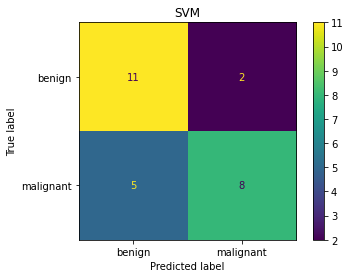

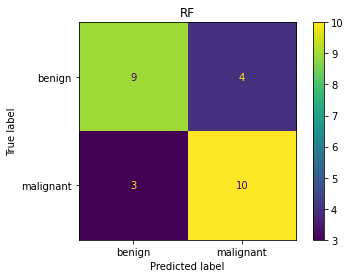

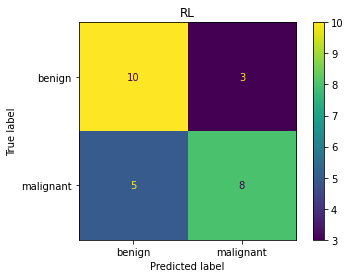

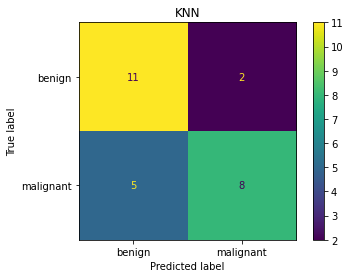

In [43]:
for key in mc:
  heatmap = ConfusionMatrixDisplay(mc[key], display_labels=('benign','malignant'))
  heatmap.plot()
  plt.title(key)

Sensibilidade, especificidade, precisão e valor predito negativo

In [44]:
'''

Sensibilidade: é a probabilidade de resultado positivo nos doentes(verdadeiro positivo) e é
calculado como: a/(a+c).

Especificidade: é a probabilidade de resultado negativo nos não-doentes (verdadeiro
negativo) e é calculado como: d/b+d.

Precisão: é a probabilidade da presença da doença quando o teste é positivo
e é calculado como: a/a+b.

Valor preditivo negativo: é a probabilidade da ausência de doença quando o teste é
negativo: d/c+d

'''
tp = dict()
tn = dict()
fp = dict()
fn = dict()

for key in mc:
  tn[key], fp[key], fn[key], tp[key] = mc[key].ravel()

In [45]:
for key in mc:
  print(key+'\t' + str(tn[key]), str(fp[key]), str(fn[key]), str(tp[key]))

SVM	11 2 5 8
RF	9 4 3 10
RL	10 3 5 8
KNN	11 2 5 8


In [46]:
sensibilidade = dict()
especificidade = dict()
precisão = dict()
vpn = dict()

for key in mc:
  sensibilidade[key] = tp[key] / (tp[key] + fn[key])
  especificidade[key] = tn[key] / (fp[key] + tn[key])
  precisão[key] = tp[key] / (tp[key] + fn[key])
  vpn[key] = tn[key] / (tn[key] + fn[key])

In [47]:
#Botar para printar
for key in mc:
  print(key)
  print('sensibilidade: ' + str(sensibilidade[key]))
  print('especificidade: ' + str(especificidade[key]))
  print('precisão: ' + str(precisão[key]))
  print('vpn: ' + str(vpn[key]))
  print('\n')

SVM
sensibilidade: 0.6153846153846154
especificidade: 0.8461538461538461
precisão: 0.6153846153846154
vpn: 0.6875


RF
sensibilidade: 0.7692307692307693
especificidade: 0.6923076923076923
precisão: 0.7692307692307693
vpn: 0.75


RL
sensibilidade: 0.6153846153846154
especificidade: 0.7692307692307693
precisão: 0.6153846153846154
vpn: 0.6666666666666666


KNN
sensibilidade: 0.6153846153846154
especificidade: 0.8461538461538461
precisão: 0.6153846153846154
vpn: 0.6875




ROC e AUC

In [51]:
'''

ROC, é uma representação gráfica que ilustra o desempenho de um sistema classificador binário à medida que o seu limiar de discriminação varia.

AUC é a área abaixo da curva

'''

'\n\nROC, é uma representação gráfica que ilustra o desempenho de um sistema classificador binário à medida que o seu limiar de discriminação varia.\n\nAUC é a área abaixo da curva\n\n'

In [48]:
y_score = dict()
auc = dict()

for key in y_pred:
  y_score[key] = classificadores[key].predict_proba(X_test_filtrado)[::,1]
  auc[key] = roc_auc_score(y_test, y_score[key])

In [49]:
auc["SVM"], 3

(0.7514792899408284, 3)

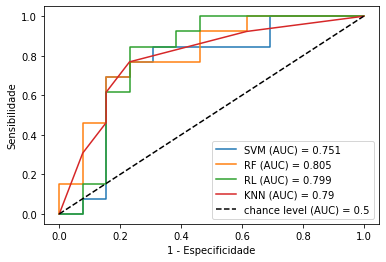

In [50]:
for key in y_pred:
  fpr, tpr, _ = roc_curve(y_test, y_score[key], pos_label='malignant')
  plt.plot(fpr,tpr, label= key + ' (AUC) = ' + str(round(auc[key], 3)))

plt.ylabel('Sensibilidade')
plt.xlabel('1 - Especificidade')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC) = 0.5")
plt.legend()
plt.show()

#S2 Mateus